# Google Data Analytics Capstone Project

### Alan T / February 2022

In this script, I will complete the Google Data Analytics capstone project (cyclistic: divvy) in Python, rather than in R as the course instructs.


The goal is to answer the following buisness tasks with the data: 

- How do annual members and casual riders use Cyclistic bikes differently?
- Why would casual riders buy Cyclistic annual memberships?
- How can Cyclistic use digital media to influence casual riders to become members?


The data is publicly available at the [Index of bucket "divvy-tripdata"](https://divvy-tripdata.s3.amazonaws.com/index.html)

In [39]:
# I will begin by importing the libraries

# for data processing
import pandas as pd
# for linear algebra
import numpy as np
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for timeseries analysis
import datetime as datetime
from datetime import timedelta
# for algebraic calculations
import math

# Allow pandas to display 500 columns and rows

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
# I´ll use 2020/04 to 2021/03 worth of data (12m)
# I begin by importing the 12 datasets, one corresponding to each month of the analysis

trip_data_2020_04 = pd. read_csv("202004-divvy-tripdata.csv")
trip_data_2020_05 = pd. read_csv("202005-divvy-tripdata.csv")
trip_data_2020_06 = pd. read_csv("202006-divvy-tripdata.csv")
trip_data_2020_07 = pd. read_csv("202007-divvy-tripdata.csv")
trip_data_2020_08 = pd. read_csv("202008-divvy-tripdata.csv")
trip_data_2020_09 = pd. read_csv("202009-divvy-tripdata.csv")
trip_data_2020_10 = pd. read_csv("202010-divvy-tripdata.csv")
trip_data_2020_11 = pd. read_csv("202011-divvy-tripdata.csv")
trip_data_2020_12 = pd. read_csv("202012-divvy-tripdata.csv")
trip_data_2021_01 = pd. read_csv("202101-divvy-tripdata.csv")
trip_data_2021_02 = pd. read_csv("202102-divvy-tripdata.csv")
trip_data_2021_03 = pd. read_csv("202103-divvy-tripdata.csv")

In [5]:
# Inspection of the datasets

trip_data_2020_04.head(2)
trip_data_2020_04.info()
trip_data_2021_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228496 entries, 0 to 228495
Data columns (to

In [6]:
# After inspecting the data, I can see that the columns "start" and "end" station ID vary of datatype
# in order to append all data, I need to convert the data into same datatypes, into strings (not floats). I create a list 
# with all the datasets:

all_data = [trip_data_2020_04,
            trip_data_2020_05,
            trip_data_2020_06,
            trip_data_2020_07,
            trip_data_2020_08,
            trip_data_2020_09,
            trip_data_2020_10,
            trip_data_2020_11,
            trip_data_2020_12,
            trip_data_2021_01,
            trip_data_2021_02,
            trip_data_2021_03]

In [7]:
# I loop for the desired columns in the 12 datasets and convert the float type into string

for dataset in all_data:
    dataset["start_station_id"] = dataset["start_station_id"].apply(str)
    dataset["end_station_id"] = dataset["end_station_id"].apply(str)

In [8]:
# I can review the altered datasets and confirm that the datatypes for those columns are str
trip_data_2020_04.info()
trip_data_2021_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  object 
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84776 non-null  object 
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(4), object(9)
memory usage: 8.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228496 entries, 0 to 228495
Data columns (total 13 col

In [9]:
# With the same datatypes across the 12 datasets, I can now append them into a single dataset

ride_data = pd.concat([trip_data_2020_04,
            trip_data_2020_05,
            trip_data_2020_06,
            trip_data_2020_07,
            trip_data_2020_08,
            trip_data_2020_09,
            trip_data_2020_10,
            trip_data_2020_11,
            trip_data_2020_12,
            trip_data_2021_01,
            trip_data_2021_02,
            trip_data_2021_03])

ride_data.head(10)
ride_data.info() # shape = (3489748, 13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489748 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 372.7+ MB


In [10]:
# NAN are inexistent values within the datasets. I will count the NANs within the data and 
# decide which treatment to give them

# Using the df.isna().sum() I can identify how many NANs are in each column. 
# By dividing the NAN coun / the total rows, I can get the percentage that these 
# NANs represent in the overall data.

(ride_data.isna().sum()/3489748) * 100

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    3.500969
start_station_id      0.000000
end_station_name      4.104652
end_station_id        0.000000
start_lat             0.000000
start_lng             0.000000
end_lat               0.135769
end_lng               0.135769
member_casual         0.000000
dtype: float64

In [11]:
# Since the NANs represent less than 5% (4.1%) of the data, I can drop them without impacting the 
# overall data distribution. The axis parameter indicates wether to drop rows (default = 0),
# or columns (axis = 1) that contain NANs. The inplace parameter isntructs to perform the 
# code inplace, mutating directly the dataset I am applying it to. 

ride_data.dropna(axis = 0, inplace = True)
ride_data.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [12]:
# In order to perform timeseries operations, I must convert the "started" and "ended" at columns
# to a datetime datatype.

ride_data["started_at"] = pd.to_datetime(ride_data["started_at"], dayfirst = True)
ride_data["ended_at"] = pd.to_datetime(ride_data["ended_at"], dayfirst = True)

In [13]:
# With the "started" and "ended" at columns as datetime datatypes, I can now extract the 
# day, the month and the time for each observation. For these, I will use lambda functions pasing
# x as the variable and hour, day_name() and month to extract the corresponding values.

ride_data["hour"] = ride_data.started_at.apply(lambda x : x.hour)
ride_data["day"] = ride_data.started_at.apply(lambda x : x.day_name())
ride_data["month"] = ride_data.started_at.apply(lambda x : x.month)

ride_data.head(2)
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295563 entries, 0 to 228494
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  hour                int64         
 14  day                 object        
 15  month               int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage: 427.4+ MB


In [14]:
# For ease of analysis and visualization, I will assign the corresponding
# name of month to the "month" column (1 = jan, 2 = feb, etc.) since they
# were extracted as integers. 

# I first create a dictionary with the month number as keys and the month
# names as values 

month_dict = {1:"Jan", 2:"Feb", 3:"Mar", 
             4:"Apr", 5:"May", 6:"Jun",
             7:"Jul", 8:"Aug", 9:"Sep",
             10:"Oct", 11:"Nov", 12:"Dec"}

In [15]:
# With the dictionary crated, I can use the map function which applies 
# the fucntion to all of the elements in the sequence or column. In this 
# case, it will iter through all of the "month" column and replace the 
# month number in a new column "month_name" with the corresponding value 
# in the dictionary

ride_data["month_name"] = ride_data["month"].map(month_dict)

In [16]:
# With the time data extracted into different columns, I can now compute the 
# ride duration for each trip

ride_data["trip_duration"] = ride_data["ended_at"] - ride_data["started_at"]

# The new "trip_duration" colum is in hh:mm:ss format. I will convert it to a 
# mm:ss format by dividing the column / minutes using the timedelta method 

ride_data["trip_duration"] = (ride_data["trip_duration"]) / timedelta(minutes = 1) 

In [17]:
# I will calculate the mean duration time per user type to review for outliers and
# negative trip duration points. This negative values represent bikes taken off
# for service or platform tests. Since I will be dropping values, I will create
# a second version of the dataset to preserve its integrity.

# To do so, I will calculate the mean, count, max and min values for trip duration
# grouped by member type and month

avg_duration = ride_data.groupby(["member_casual","month"])["trip_duration"].agg(["mean","count", "max", "min"])
avg_duration

mean   count           max           min
member_casual month                                               
casual        1      26.370003   14690  19825.916667      0.016667
              2      47.137118    8613  30129.233333      0.033333
              3      38.479974   75642  31681.650000     -0.016667
              4      72.435153   23588  55683.883333     -0.550000
              5      50.568390   86763  28896.883333     -0.850000
              6      51.173306  154509  38536.750000     -1.966667
              7      59.148199  268734  49965.450000    -35.383333
              8      44.079252  283069  40846.366667     -4.333333
              9      38.293938  215463  54283.350000     -2.183333
              10     31.144901  122981  35724.383333    -95.016667
              11     33.374755   73103  35934.000000    -53.883333
              12    -37.578224   24552   9740.983333 -28995.916667
member        1      12.030958   68819   1226.683333      0.000000
              2      14.780341   34383   1474.350000      0.000000
              3      13.664984  130049   1467.033333     -0.016667
              4      21.357266   61089  58720.033333     -2.933333
              5      19.569970  113190   7074.550000     -1.800000
              6      18.509368  188028  41271.000000     -4.050000
              7      17.496203  281692  15105.066667   -120.300000
              8      16.483824  325588  33421.366667    -10.250000
              9      15.193176  285221  31169.600000     -9.166667
              10     13.822120  216605   9557.783333  -3890.066667
              11     13.423608  149833   1499.933333    -51.500000
              12    -70.609645   89359   1499.833333 -29049.966667

In [18]:
# I create a duplicate verison of the data base where I only keep records of trip durations
# of more than 1 minute and less than 720 minutes (12 hrs) to prevent including bikes
# that went to service, misfires, and other platform errors. This decision should be 
# consented by the stakeholders.  

ride_data_v2 = ride_data[(ride_data["trip_duration"] > 0) & (ride_data["trip_duration"] < 720) & (ride_data["trip_duration"] > 1)]
ride_data_v2.head(20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day,month,month_name,trip_duration
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,17,Sunday,4,Apr,26.816667
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,17,Friday,4,Apr,8.150000
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,17,Wednesday,4,Apr,14.383333
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12,Tuesday,4,Apr,12.200000
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,10,Saturday,4,Apr,52.916667
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,41.8969,-87.6217,41.8923,-87.6120,member,17,Thursday,4,Apr,5.400000
6,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635.0,41.8923,-87.6120,41.8957,-87.6201,member,14,Thursday,4,Apr,5.216667
7,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382.0,41.8665,-87.6847,41.8747,-87.6864,casual,12,Tuesday,4,Apr,75.816667
8,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359.0,41.8949,-87.6323,41.9035,-87.6434,casual,10,Wednesday,4,Apr,5.733333
9,A8FFF89140C33017,docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,Kedzie Ave & Lake St,377,Central Park Ave & North Ave,508.0,41.8846,-87.7063,41.9097,-87.7166,member,15,Saturday,4,Apr,17.316667


In [19]:
# I check to see hwo many rows of data I dropped

ride_data.shape
ride_data_v2.shape

(3295563 - 3236420) / 3295563 # = 1.79%

0.017946250762009404

In [20]:
# I check for trips with negative trip durations

less_than_0 = ride_data_v2[ride_data_v2["trip_duration"] < 0]
less_than_0

ride_data.head(20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day,month,month_name,trip_duration
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,17,Sunday,4,Apr,26.816667
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,17,Friday,4,Apr,8.150000
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,17,Wednesday,4,Apr,14.383333
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12,Tuesday,4,Apr,12.200000
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,10,Saturday,4,Apr,52.916667
5,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,41.8969,-87.6217,41.8923,-87.6120,member,17,Thursday,4,Apr,5.400000
6,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635.0,41.8923,-87.6120,41.8957,-87.6201,member,14,Thursday,4,Apr,5.216667
7,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382.0,41.8665,-87.6847,41.8747,-87.6864,casual,12,Tuesday,4,Apr,75.816667
8,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359.0,41.8949,-87.6323,41.9035,-87.6434,casual,10,Wednesday,4,Apr,5.733333
9,A8FFF89140C33017,docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,Kedzie Ave & Lake St,377,Central Park Ave & North Ave,508.0,41.8846,-87.7063,41.9097,-87.7166,member,15,Saturday,4,Apr,17.316667


In [21]:
# I calculate mean, max, and min durations for each member type by month

avg_duration_v2 = ride_data_v2.groupby(["member_casual","month"])["trip_duration"].agg(["mean","count", "max", "min"])
avg_duration_v2

mean   count         max       min
member_casual month                                         
casual        1      20.662669   14543  656.100000  1.033333
              2      27.783170    8458  666.133333  1.016667
              3      30.511393   74823  707.750000  1.016667
              4      36.307379   23259  687.983333  1.016667
              5      41.433240   85644  718.883333  1.016667
              6      39.555685  152335  715.700000  1.016667
              7      41.928048  264789  718.950000  1.016667
              8      36.133011  277307  719.050000  1.016667
              9      31.382831  211765  719.066667  1.016667
              10     26.965957  120480  718.300000  1.016667
              11     28.033159   72014  713.683333  1.016667
              12     22.607474   24259  690.850000  1.016667
member        1      12.083080   68024  667.166667  1.016667
              2      14.353796   33765  713.583333  1.016667
              3      13.711761  128316  709.600000  1.016667
              4      17.649724   60181  697.450000  1.016667
              5      19.236434  111384  706.283333  1.016667
              6      18.154065  184908  715.300000  1.016667
              7      17.287690  276054  714.966667  1.016667
              8      16.197598  318226  718.066667  1.016667
              9      14.919707  279016  682.850000  1.016667
              10     13.615830  211707  702.616667  1.016667
              11     13.478456  147119  662.183333  1.016667
              12     12.344752   88044  710.850000  1.016667

In [22]:
# I can calculate the straight line distance between the start and end coordinates
# for each trip. In order to do so, I will first calculate the distance difference
# with the given coordinates and then convert them to KMs (1 degree of Lat = 110.56 kms)


ride_data_v2["distance"] = np.sqrt(((ride_data_v2["end_lat"]-ride_data_v2["start_lat"])**2) + 
                                (ride_data_v2["end_lng"] - ride_data_v2["start_lng"])**2)

avg_distance_v2 = ride_data_v2.groupby(["member_casual","month"])["distance"].agg(["mean","count", "max", "min"])
avg_distance_v2

C:\Users\Alan\AppData\Local\Temp/ipykernel_144/39782584.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ride_data_v2["distance"] = np.sqrt(((ride_data_v2["end_lat"]-ride_data_v2["start_lat"])**2) +


mean   count       max  min
member_casual month                                 
casual        1      0.019555   14543  0.198653  0.0
              2      0.020474    8458  0.176315  0.0
              3      0.020684   74823  0.246906  0.0
              4      0.020108   23259  0.172852  0.0
              5      0.020739   85644  0.249575  0.0
              6      0.022257  152335  0.254087  0.0
              7      0.020784  264789  0.269405  0.0
              8      0.022539  277307  0.255395  0.0
              9      0.022928  211765  0.280245  0.0
              10     0.022773  120480  0.245252  0.0
              11     0.022447   72014  0.293522  0.0
              12     0.020496   24259  0.264852  0.0
member        1      0.019774   68024  0.192243  0.0
              2      0.020111   33765  0.161773  0.0
              3      0.021561  128316  0.184651  0.0
              4      0.022149   60181  0.177322  0.0
              5      0.023689  111384  0.176625  0.0
              6      0.024285  184908  0.177933  0.0
              7      0.024504  276054  0.220088  0.0
              8      0.024206  318226  0.256939  0.0
              9      0.023651  279016  0.234234  0.0
              10     0.022662  211707  0.234234  0.0
              11     0.021948  147119  0.449423  0.0
              12     0.020098   88044  0.234181  0.0

In [23]:
# Convert difference in degrees to KMs using the conversion factor and round the 
# result to 2 decimals

conversion_factor = 110.56
ride_data_v2["distance"] = (ride_data_v2["distance"] * conversion_factor).round(2)

C:\Users\Alan\AppData\Local\Temp/ipykernel_144/3154648417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ride_data_v2["distance"] = (ride_data_v2["distance"] * conversion_factor).round(2)


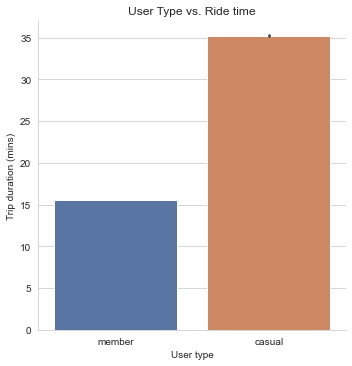

In [32]:
# Data visualization using seaborn 

# Ride time per user type
sns.set_style("whitegrid")
user_time = sns.catplot(x = "member_casual", y = "trip_duration", data = ride_data_v2,
                        palette = "deep", kind = "bar")
user_time.set(title = "User Type vs. Ride time",
              xlabel = "User type",
              ylabel = "Trip duration (mins)")
plt.show()

This first graph demonstrates the average trip durations comparing members vs. casual riders. Casual riders durations are more than 2x the time for members. 

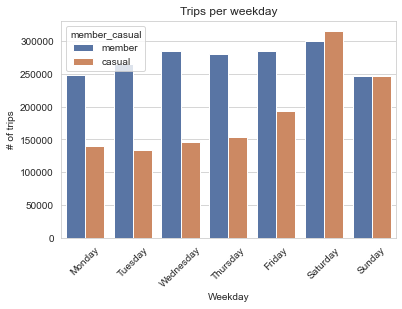

In [33]:
# Number of trips per weekday
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
trips_per_weekday = sns.countplot(x = "day", data = ride_data_v2, 
                           palette = "deep", order = day_order, hue = "member_casual")
trips_per_weekday.set(title = "Trips per weekday",
              xlabel = "Weekday",
              ylabel = "# of trips")
plt.xticks(rotation = 45)
plt.show()

Members use the bikes in a constant manner through Monday-Saturday. Casual riders use almost 50% less the bikes in the same days when compared to members. For both user types, Saturdays are the days with the most rides.

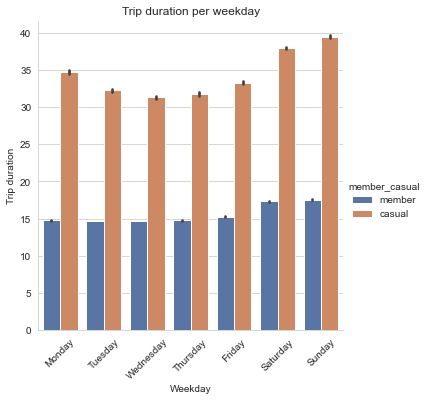

In [36]:
# Trip duration per weekday and user type
sns.set_style("whitegrid")
user_duration = sns.catplot(x = "day", y = "trip_duration", data = ride_data_v2,
                            palette = "deep", hue = "member_casual", order = day_order, kind = "bar")
user_duration.set(title = "Trip duration per weekday",
                  xlabel = "Weekday", 
                  ylabel = "Trip duration")
plt.xticks(rotation = 45)
plt.show()

Members trip duration (min) is constant throughout the weekdays, with around 15 mins in average trip duration. This number increases slightly for the weekends, with an average of 17 mins for Saturdays and Sundays. This can reflect how members use the bikes for their daily, frequent routines thorugh the week and for additional activities on the weekends. 

This story is different for the casual riders, who have their lowest trip durations on Tuesday through Friday, with an average of 32 mins, and their highest trip durations on Fridays through Mondays. This can indicate that tourists visit the city on weekends and use the bikes to tour around. 

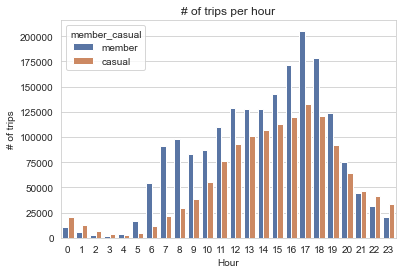

In [35]:
# Number of trips per hour of the day (by user type)
trips_per_hour = sns.countplot(x = "hour", data = ride_data, 
                           palette = "deep", hue = "member_casual")
trips_per_hour.set(title = "# of trips per hour",
              xlabel = "Hour",
              ylabel = "# of trips")
plt.show()

This graph demonstrates the number of trips per hour comparing members versus casual riders. In both cases, the usage begins at around 6 am and ends at around 11 pm. However, members trip count is much higher than casual riders between 6 am and 10 am suggesting members commuting to their workplaces. 

There are minimum number of trips between 1 am and 4 am. This window of time can be used to perform maintenance operations on the bikes and stations. 

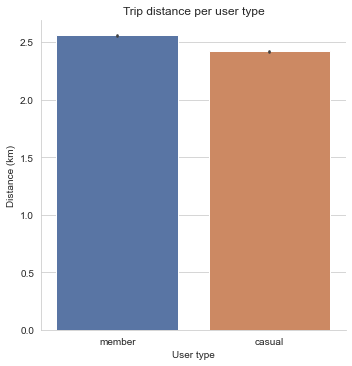

In [37]:
# Trip distance per weekday and user type
user_duration = sns.catplot(x = "member_casual", y = "distance", data = ride_data_v2,
                            palette = "deep", kind = "bar")
user_duration.set(title = "Trip distance per user type",
                  xlabel = "User type", 
                  ylabel = "Distance (km)")
plt.show()

The average trip distance is very similar between members (2.6 KM) and casual riders (2.4 KM), even though their trip durations are different by almost 50%. This suggests that members ride directly to their destinations using their known routes without any stops, while casual riders stop constantly to do tourists activities such as taking pictures, looking at maps, etc. 

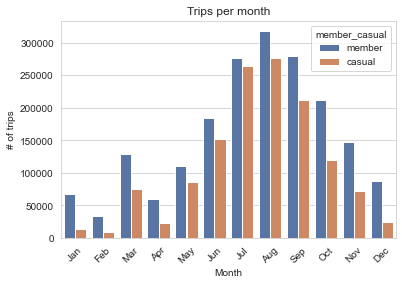

In [38]:
# # of trips per month
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug",
               "Sep", "Oct", "Nov", "Dec"]
trips_per_month = sns.countplot(x = "month_name", data = ride_data_v2, 
                           palette = "deep", hue = "member_casual", order = month_order)
trips_per_month.set(title = "Trips per month",
              xlabel = "Month",
              ylabel = "# of trips")
plt.xticks(rotation = 45)
plt.show()

The count of trips per month is at it´s peak in the summer, from June to September. This can correlate to warmer months bringing in tourists (casual riders) and making it more attractive to members to use the bikes for their day-to-day activities.

## The goal is to answer the following buisness tasks with the data: 

- How do annual members and casual riders use Cyclistic bikes differently?
- Why would casual riders buy Cyclistic annual memberships?
- How can Cyclistic use digital media to influence casual riders to become members?
    
### Insights:
- A point rewards system could be created, awarding users for their usage in duration (mins) and distance. Members could be awarded 1.5x or 2x more points than casual users for the same trip. Users could then excahnge points for free rides. Point based competions between with attractive monthly/yearly prices could motivate users to try to gain as much points as possible.


- Member trips last 15 minutes on average, while casual riders ride for 45 minutes on average. Members can be assumed to be users that use divy to commute to work and have daily routines. Casual riders can be assumed to be tourists or users that use the service for leisure or personal activities. A possible strategy to convert casual riders into member riders is to reduce the cost of trips over 20 minutes for members, or to increase the points awarded after the 20 minute mark per member trip. 


- Members use the bikes in a consistent manner across the week, peaking in the weekends by a slight difference vs. other days. Casual users have almost 25% more trips on the  weekends when compared to weekdays. This gives opportunity to introduce discounts or  additional commercial strategies for member trips during the weekdays, awarding them extra points for trips on Monday - Friday. 


- The peak hour for memebrs trips are in the morning, between 6am and 8 am  which can be correlated to commuting to work hours, and between 4pm and 6pm that can be correlated to commuting from work to home. Casual riders beahave differently - evenly distributed during the day after 11 am . Members could be incentivated to use the bikes in the weekdays not only for their routines but for additional activites as well by rewarding them with extra points for trips after 6 pm. 


- Members could get additional points by sharing pictures on social media (Facebook, Instagram, Twitter, etc) while using their bikes. 

Thank you for reading. Code suggestions, tips and comments are welcomed! 